In [1]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 5.1 MB/s eta 0:00:00


In [3]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 53.3 MB/s eta 0:00:00


In [4]:
from rdkit import Chem

In [10]:
import requests
import pandas as pd

url = "https://www.ebi.ac.uk/chembl/api/data/target.json"

params = {
    "pref_name__icontains": "dopamine receptor d2",
    "organism": "Homo sapiens"
}

response = requests.get(url, params=params)
data = response.json()

targets = pd.DataFrame(data["targets"])
targets

,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Dopamine receptor D2L/neurotensin receptor NTS1,False,CHEMBL3038478,"[{'accession': 'P14416', 'component_descriptio...",PROTEIN COMPLEX,9606


In [11]:
url = "https://www.ebi.ac.uk/chembl/api/data/target.json"

params = {
    "pref_name__icontains": "dopamine",
    "organism": "Homo sapiens",
    "limit": 100
}

response = requests.get(url, params=params)
data = response.json()

targets = pd.DataFrame(data["targets"])
targets[["pref_name", "target_type", "target_chembl_id"]]

,pref_name,target_type,target_chembl_id
0,D(2) dopamine receptor,SINGLE PROTEIN,CHEMBL217
1,D(1A) dopamine receptor,SINGLE PROTEIN,CHEMBL2056
2,D(4) dopamine receptor,SINGLE PROTEIN,CHEMBL219
3,D(3) dopamine receptor,SINGLE PROTEIN,CHEMBL234
4,Sodium-dependent dopamine transporter,SINGLE PROTEIN,CHEMBL238
5,D(1B) dopamine receptor,SINGLE PROTEIN,CHEMBL1850
6,Dopamine beta-hydroxylase,SINGLE PROTEIN,CHEMBL3102
7,Dopamine receptors; D2 & D3,SELECTIVITY GROUP,CHEMBL2095169
8,Monoamine transporters; serotonin & dopamine,SELECTIVITY GROUP,CHEMBL2095201
9,Dopamine receptors; D2 & D4,SELECTIVITY GROUP,CHEMBL2095396


In [12]:
activity_url = "https://www.ebi.ac.uk/chembl/api/data/activity.json"

params = {
    "target_chembl_id": "CHEMBL217",
    "standard_type": "IC50",
    "standard_units": "nM",
    "standard_relation": "=",
    "limit": 1000
}

response = requests.get(activity_url, params=params)
data = response.json()

activities = pd.DataFrame(data["activities"])
activities.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32111,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,D(2) dopamine receptor,9606,None,None,IC50,nM,UO_0000065,None,9800.0
1,None,None,33282,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,D(2) dopamine receptor,9606,None,None,IC50,nM,UO_0000065,None,50.0
2,None,None,38258,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,D(2) dopamine receptor,9606,None,None,IC50,nM,UO_0000065,None,25.0
3,None,None,39387,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,D(2) dopamine receptor,9606,None,None,IC50,nM,UO_0000065,None,360.0
4,None,None,39391,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,D(2) dopamine receptor,9606,None,None,IC50,nM,UO_0000065,None,300.0


In [13]:
activities.columns.tolist()

['action_type',
 'activity_comment',
 'activity_id',
 'activity_properties',
 'assay_chembl_id',
 'assay_description',
 'assay_type',
 'assay_variant_accession',
 'assay_variant_mutation',
 'bao_endpoint',
 'bao_format',
 'bao_label',
 'canonical_smiles',
 'data_validity_comment',
 'data_validity_description',
 'document_chembl_id',
 'document_journal',
 'document_year',
 'ligand_efficiency',
 'molecule_chembl_id',
 'molecule_pref_name',
 'parent_molecule_chembl_id',
 'pchembl_value',
 'potential_duplicate',
 'qudt_units',
 'record_id',
 'relation',
 'src_id',
 'standard_flag',
 'standard_relation',
 'standard_text_value',
 'standard_type',
 'standard_units',
 'standard_upper_value',
 'standard_value',
 'target_chembl_id',
 'target_organism',
 'target_pref_name',
 'target_tax_id',
 'text_value',
 'toid',
 'type',
 'units',
 'uo_units',
 'upper_value',
 'value']

In [15]:
import requests
import pandas as pd

base_url = "https://www.ebi.ac.uk"

activity_url = "https://www.ebi.ac.uk/chembl/api/data/activity.json"

params = {
    "target_chembl_id": "CHEMBL217",
    "standard_type": "IC50",
    "standard_units": "nM",
    "standard_relation": "=",
    "limit": 1000
}

all_activities = []

while activity_url:
    response = requests.get(activity_url, params=params)
    data = response.json()

    all_activities.extend(data["activities"])

    next_page = data["page_meta"]["next"]

    if next_page:
        activity_url = base_url + next_page
        params = None  # pagination handled by next URL
    else:
        activity_url = None

activities = pd.DataFrame(all_activities)

activities.shape

(1100, 46)

In [16]:
activities["molecule_chembl_id"].nunique(), activities.shape

(891, (1100, 46))

In [17]:
unique_mols = activities["molecule_chembl_id"].unique().tolist()
len(unique_mols)

891

In [18]:
molecule_url = "https://www.ebi.ac.uk/chembl/api/data/molecule.json"
base_url = "https://www.ebi.ac.uk"

all_molecules = []

for i in range(0, len(unique_mols), 100):
    batch = unique_mols[i:i+100]
    ids_string = ",".join(batch)

    response = requests.get(
        molecule_url,
        params={"molecule_chembl_id__in": ids_string, "limit": 100}
    )

    data = response.json()
    all_molecules.extend(data["molecules"])

molecules = pd.DataFrame(all_molecules)
molecules.shape

(891, 35)

In [19]:
molecules["molecule_structures"].iloc[0]

{'canonical_smiles': 'CN1CCN2c3ccccc3Cc3ccccc3C2C1',
 'molfile': '\n     RDKit          2D\n\n 20 23  0  0  0  0  0  0  0  0999 V2000\n    0.0292    0.1208    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    1.3375    0.1208    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.7708    1.1375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1500    1.1375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.4833    2.4083    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.8542    2.4083    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6208   -1.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.3292   -2.1375    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.6875    2.9833    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.9917   -1.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.0375   -2.1375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0208    0.7458    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.3917   

In [20]:
molecules["canonical_smiles"] = molecules["molecule_structures"].apply(
    lambda x: x["canonical_smiles"] if isinstance(x, dict) else None
)

molecules[["molecule_chembl_id", "canonical_smiles"]].head()

,molecule_chembl_id,canonical_smiles
0,CHEMBL6437,CN1CCN2c3ccccc3Cc3ccccc3C2C1
1,CHEMBL39,NCCc1c[nH]c2ccc(O)cc12
2,CHEMBL42,CN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1
3,CHEMBL415300,CN1CCN(C2=Nc3ccccc3Nc3ccc(Cl)cc32)CC1
4,CHEMBL54,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1


In [21]:
molecules["canonical_smiles"].isnull().sum()

np.int64(1)

In [22]:
merged = activities.merge(
    molecules[["molecule_chembl_id", "canonical_smiles"]],
    on="molecule_chembl_id",
    how="left"
)

merged.shape

(1100, 47)

In [23]:
merged["canonical_smiles"].isnull().sum()

KeyError: 'canonical_smiles'

In [24]:
merged.columns.tolist()

['action_type',
 'activity_comment',
 'activity_id',
 'activity_properties',
 'assay_chembl_id',
 'assay_description',
 'assay_type',
 'assay_variant_accession',
 'assay_variant_mutation',
 'bao_endpoint',
 'bao_format',
 'bao_label',
 'canonical_smiles_x',
 'data_validity_comment',
 'data_validity_description',
 'document_chembl_id',
 'document_journal',
 'document_year',
 'ligand_efficiency',
 'molecule_chembl_id',
 'molecule_pref_name',
 'parent_molecule_chembl_id',
 'pchembl_value',
 'potential_duplicate',
 'qudt_units',
 'record_id',
 'relation',
 'src_id',
 'standard_flag',
 'standard_relation',
 'standard_text_value',
 'standard_type',
 'standard_units',
 'standard_upper_value',
 'standard_value',
 'target_chembl_id',
 'target_organism',
 'target_pref_name',
 'target_tax_id',
 'text_value',
 'toid',
 'type',
 'units',
 'uo_units',
 'upper_value',
 'value',
 'canonical_smiles_y']

In [27]:
merged[["canonical_smiles_x", "canonical_smiles_y"]].head()

,canonical_smiles_x,canonical_smiles_y
0,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1
1,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1
2,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1
3,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1
4,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1


In [28]:
merged = merged.drop(columns=["canonical_smiles_y"])
merged = merged.rename(columns={"canonical_smiles_x": "canonical_smiles"})

merged.columns.tolist()

['action_type',
 'activity_comment',
 'activity_id',
 'activity_properties',
 'assay_chembl_id',
 'assay_description',
 'assay_type',
 'assay_variant_accession',
 'assay_variant_mutation',
 'bao_endpoint',
 'bao_format',
 'bao_label',
 'canonical_smiles',
 'data_validity_comment',
 'data_validity_description',
 'document_chembl_id',
 'document_journal',
 'document_year',
 'ligand_efficiency',
 'molecule_chembl_id',
 'molecule_pref_name',
 'parent_molecule_chembl_id',
 'pchembl_value',
 'potential_duplicate',
 'qudt_units',
 'record_id',
 'relation',
 'src_id',
 'standard_flag',
 'standard_relation',
 'standard_text_value',
 'standard_type',
 'standard_units',
 'standard_upper_value',
 'standard_value',
 'target_chembl_id',
 'target_organism',
 'target_pref_name',
 'target_tax_id',
 'text_value',
 'toid',
 'type',
 'units',
 'uo_units',
 'upper_value',
 'value']

In [29]:
merged["canonical_smiles"].isnull().sum()

np.int64(1)

In [30]:
merged = merged.dropna(subset=["canonical_smiles", "standard_value"])

merged.shape

(1099, 46)

In [31]:
merged["standard_value"] = pd.to_numeric(merged["standard_value"], errors="coerce")

merged["standard_value"].isnull().sum()

np.int64(0)

In [32]:
import numpy as np

merged["pIC50"] = 9 - np.log10(merged["standard_value"])

merged[["standard_value", "pIC50"]].head()

,standard_value,pIC50
0,9800.0,5.008774
1,50.0,7.301030
2,25.0,7.602060
3,360.0,6.443697
4,300.0,6.522879


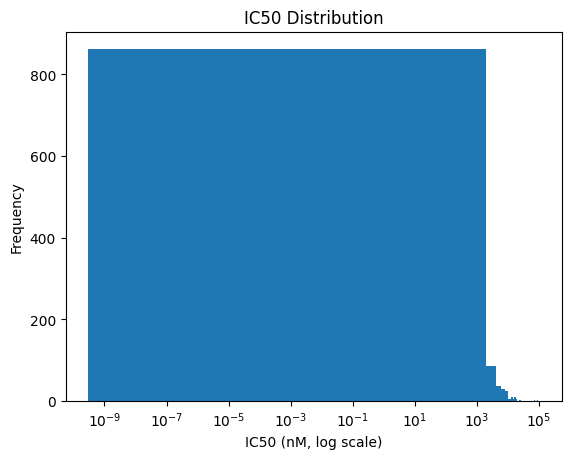

In [33]:
import matplotlib.pyplot as plt

plt.hist(merged["standard_value"], bins=50)
plt.xscale("log")
plt.xlabel("IC50 (nM, log scale)")
plt.ylabel("Frequency")
plt.title("IC50 Distribution")
plt.show()

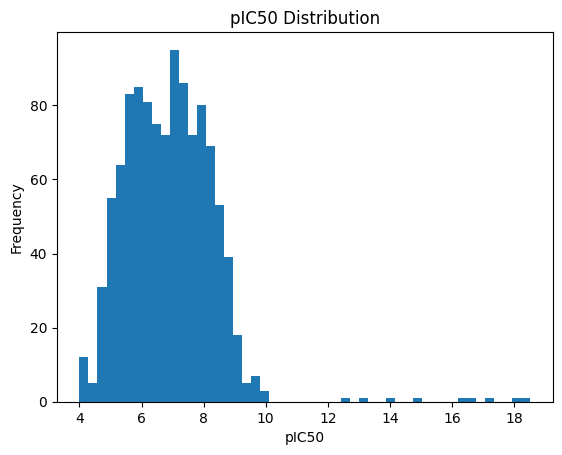

In [34]:
plt.hist(merged["pIC50"], bins=50)
plt.xlabel("pIC50")
plt.ylabel("Frequency")
plt.title("pIC50 Distribution")
plt.show()

In [35]:
merged.sort_values("pIC50", ascending=False)[
    ["molecule_chembl_id", "standard_value", "pIC50"]
].head(10)

,molecule_chembl_id,standard_value,pIC50
76,CHEMBL267930,3.000000e-10,18.522879
75,CHEMBL225230,1.000000e-09,18.000000
77,CHEMBL1255588,5.000000e-09,17.301030
73,CHEMBL267044,2.000000e-08,16.698970
74,CHEMBL26736,4.000000e-08,16.397940
72,CHEMBL225230,1.000000e-06,15.000000
79,CHEMBL59,8.000000e-06,14.096910
80,CHEMBL1437,8.000000e-05,13.096910
78,CHEMBL39,3.000000e-04,12.522879
1043,CHEMBL5900385,9.200000e-02,10.036212


In [36]:
merged[["standard_value", "standard_units"]].head(20)

,standard_value,standard_units
0,9800.0,nM
1,50.0,nM
2,25.0,nM
3,360.0,nM
4,300.0,nM
5,70.0,nM
6,49.0,nM
7,60.0,nM
8,120.0,nM
9,2300.0,nM


In [37]:
merged["standard_value"].describe()

,standard_value
count,1.099000e+03
mean,2.690674e+03
std,9.253464e+03
min,3.000000e-10
25%,1.395000e+01
50%,1.460000e+02
75%,1.500000e+03
max,1.000000e+05


In [38]:
def convert_to_molar(x):
    if x > 1:
        return x * 1e-9  # nM → M
    else:
        return x  # already M

merged["IC50_M"] = merged["standard_value"].apply(convert_to_molar)

merged["IC50_M"].describe()

,IC50_M
count,1.099000e+03
mean,1.155136e-02
std,8.908227e-02
min,3.000000e-10
25%,2.290000e-08
50%,1.920000e-07
75%,1.902730e-06
max,1.000000e+00


In [39]:
merged["pIC50"] = -np.log10(merged["IC50_M"])

merged["pIC50"].describe()

,pIC50
count,1099.000000
mean,6.601414
std,1.500640
min,-0.000000
25%,5.720623
50%,6.716699
75%,7.640165
max,9.522879


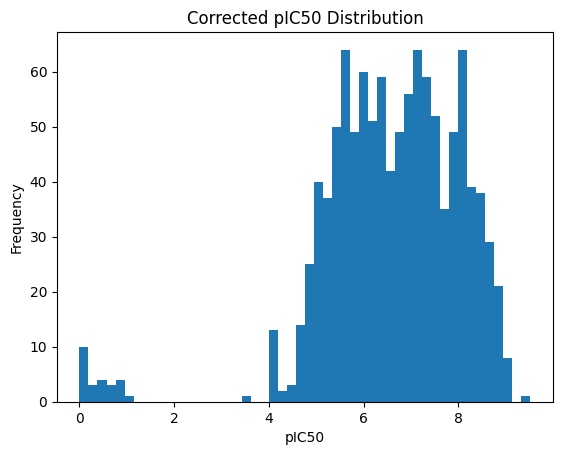

In [40]:
plt.hist(merged["pIC50"], bins=50)
plt.xlabel("pIC50")
plt.ylabel("Frequency")
plt.title("Corrected pIC50 Distribution")
plt.show()

In [41]:
aggregated = (
    merged
    .groupby("canonical_smiles")
    .agg(
        molecule_chembl_id=("molecule_chembl_id", "first"),
        pIC50=("pIC50", "median"),
        IC50_M=("IC50_M", "median"),
        count_measurements=("pIC50", "count")
    )
    .reset_index()
)

aggregated.shape

(890, 5)

In [42]:
aggregated["pIC50"].describe()

,pIC50
count,890.000000
mean,6.650175
std,1.269140
min,0.008774
25%,5.760639
50%,6.696809
75%,7.575938
max,8.987163


In [43]:
Q1 = aggregated["pIC50"].quantile(0.25)
Q3 = aggregated["pIC50"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(3.037691722418077), np.float64(10.298885413279155))

In [44]:
outliers = aggregated[
    (aggregated["pIC50"] < lower_bound) |
    (aggregated["pIC50"] > upper_bound)
]

outliers.shape

(6, 5)

In [45]:
aggregated.to_csv("drd2_cleaned_dataset.csv", index=False)